In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/last-data/data.csv")
data = data.drop(["Unnamed: 0"] ,axis = 1)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke
0,17.000000,0,0,115.930000,23.300000,0,1,0,0,0,1,0,0,0,0,1,0
1,77.000000,1,0,117.660000,25.700000,1,0,1,0,1,1,0,0,0,0,1,0
2,27.000000,0,0,135.240000,23.800000,1,1,0,0,0,0,0,1,0,0,1,0
3,48.000000,0,0,86.200000,37.600000,0,1,0,0,1,0,0,1,0,0,0,0
4,33.000000,0,0,96.870000,33.900000,1,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36715,59.044911,0,0,216.980238,28.567128,0,1,0,0,1,1,0,0,0,0,0,1
36716,83.096971,0,1,93.928284,20.340151,1,1,0,0,1,0,0,0,1,0,0,1
36717,79.236926,0,0,107.349678,29.895140,0,1,0,0,1,0,0,1,0,0,1,1
36718,72.541514,1,1,110.136637,24.783518,1,1,0,0,1,1,0,0,1,0,0,1


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[['smoking_status']])

# Get the categories that were encoded
categories = encoder.categories_

# Create custom column names based on the categories
column_names = [f'smoking_status_{cat}' for cat in categories[0][0:]]

# Create a new DataFrame with the one-hot encoded columns and custom column names
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

# Concatenate the new DataFrame with the original DataFrame, drop the original 'smoking_status' column
data = pd.concat([data, encoded_df], axis=1).drop(columns=['smoking_status'] ,axis = 1)
data

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,smoking_status_0,smoking_status_1,smoking_status_2
0,17.000000,0,0,115.930000,23.300000,1,0,0,0,1,0,0,0,0,1,0,1.0,0.0,0.0
1,77.000000,1,0,117.660000,25.700000,0,1,0,1,1,0,0,0,0,1,0,0.0,1.0,0.0
2,27.000000,0,0,135.240000,23.800000,1,0,0,0,0,0,1,0,0,1,0,0.0,1.0,0.0
3,48.000000,0,0,86.200000,37.600000,1,0,0,1,0,0,1,0,0,0,0,1.0,0.0,0.0
4,33.000000,0,0,96.870000,33.900000,1,0,0,1,0,0,1,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36715,59.044911,0,0,216.980238,28.567128,1,0,0,1,1,0,0,0,0,0,1,1.0,0.0,0.0
36716,83.096971,0,1,93.928284,20.340151,1,0,0,1,0,0,0,1,0,0,1,0.0,1.0,0.0
36717,79.236926,0,0,107.349678,29.895140,1,0,0,1,0,0,1,0,0,1,1,1.0,0.0,0.0
36718,72.541514,1,1,110.136637,24.783518,1,0,0,1,1,0,0,1,0,0,1,0.0,1.0,0.0


In [4]:
sc = MinMaxScaler()


X = data.drop(["stroke"] ,axis = 1)
y = data["stroke"]

X[["age", "avg_glucose_level", "bmi"]] = sc.fit_transform(X[["age", "avg_glucose_level", "bmi"]])

#X = X.sort_values(by='age', ascending=True)
#X.set_index(np.arange(0,len(data),1),inplace=True)

X_train = X
y_train = y

scaler = StandardScaler()

X_train = X_train.values
y_train = y_train.values

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_train = X_train.reshape(len(X_train), 3, 6)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:
import torch
import torch.nn as nn

class Block(nn.Module):
    def __init__(self ,inChanel,out1 ,out2, out3 ,outChanel):
        super(Block, self).__init__()
        self.input = inChanel
        self.conv1 = nn.Conv2d(inChanel, out1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out1, out2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(out2, out3, kernel_size=2, padding=1)
        self.conv4 = nn.Conv2d(out3, outChanel, kernel_size=2, padding=1)
        temp = outChanel // 2
        self.conv5 = nn.Conv2d(outChanel, temp ,kernel_size=1, padding=0)
        self.pooling = nn.MaxPool2d(kernel_size=2)
        self.relu = nn.PReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.conv5(x)
        x = self.relu(x)
        x = self.pooling(x)
        return x

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        
        self.block1 = Block(1 ,8 ,16, 32 ,64)
        self.block2 = Block(32 ,64 ,100 ,128 ,256)
        self.block3 = Block(128 ,256 ,512 ,800 ,1024)
        
        self.linear1 = nn.Linear(512, 256)
        self.linear2 = nn.Linear(256, 64)
        self.linear3 = nn.Linear(64, 1)
        self.pooling = nn.MaxPool2d(kernel_size=2)
        self.relu = nn.PReLU()
        
        
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.pooling(x)
        x = x.squeeze()
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x

In [7]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 128

X_B_train, X_val , y_B_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_B_train, y_B_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size ,shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size ,shuffle=True)

In [8]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [200]:
from torch.utils.tensorboard import SummaryWriter

log_dir = "CNN"  # Change this to your desired log directory
writer = SummaryWriter()

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import compute_class_weight
import time
from torchmetrics import Accuracy
from torchmetrics.classification import BinaryAccuracy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = CNNClassifier().to(device)

class_weights = compute_class_weight(class_weight="balanced", classes=y_train.unique().detach().numpy(), y=y_train.detach().numpy())
pos_weight = torch.tensor([class_weights[1]], dtype=torch.float32).to(device) 
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([24], dtype=torch.float32).to(device)) # Ensure it's on the same device

optimizer = optim.Adam(model.parameters(), lr=0.001)  
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10.0, gamma=0.5)

num_epochs = 100  

best_acc = 0
best_loss = 100
loss_train_hist = []
acc_train_hist = []
loss_val_hist = []
acc_val_hist = []

for epoch in range(num_epochs):
    start_time = time.time()
    epoch_loss = 0.0
    correct_preds = 0
    total_preds = 0
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        inputs = inputs.unsqueeze(1)
        inputs = inputs.float()
        targets = targets.float()

        outputs = model(inputs)
        
        loss = criterion(outputs.squeeze(), targets)

        loss.backward()

        optimizer.step()
        

        epoch_loss += loss.item()

        predictions = torch.round(torch.sigmoid(outputs))

        for i in range(targets.size(0)):
            if predictions[i] == targets[i]:
                correct_preds += 1

        total_preds += targets.size(0) 
        
    
    model.eval()
    with torch.no_grad():
        acc_val = BinaryAccuracy().to(device)
        loss_val = AverageMeter()
        for (inputs ,targets) in val_loader:
            inputs ,targets = inputs.to(device) ,targets.to(device)
            inputs = inputs.unsqueeze(1)
            inputs = inputs.float()
            targets = targets.float()
            outputs_val = model(inputs)
            loss_val.update(loss.item())
            acc_val(outputs_val.squeeze(), targets)
            #(acc_val.compute() > best_acc) and
            if (loss_val.avg < best_loss):
                print("model save!")
                torch.save(model, f'Model{epoch}.pt')
                best_acc = acc_val.compute()
                best_loss = loss_val.avg


    accuracy = correct_preds / total_preds
    avg_loss = epoch_loss / len(train_loader)  # Use 'train_loader' instead of 'dataloader'
    end_time = time.time()
    loss_train_hist.append(avg_loss)
    acc_train_hist.append(accuracy)
    loss_val_hist.append(loss_val.avg)
    acc_val_hist.append(acc_val.compute().item())
    epoch_time = end_time - start_time
    scheduler.step()
    
    writer.add_scalar('Loss', loss.item(), global_step=epoch)
    writer.add_scalar('Accuracy', accuracy, global_step=epoch)
    
    for name, param in model.named_parameters():
        writer.add_histogram(name, param, global_step=epoch)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss Train: {avg_loss:.4f}, Accuracy Train: {accuracy:.4f}, Time taken: {epoch_time:.2f} seconds")
    print(f"Average Loss Val: {loss_val.avg:.4f}, Accuracy Val: {acc_val.compute():.4f}")
    
writer.flush()

model save!
Epoch 1/100, Average Loss Train: 1.7392, Accuracy Train: 0.0789, Time taken: 17.85 seconds
Average Loss Val: 1.7865, Accuracy Val: 0.0720
model save!
Epoch 2/100, Average Loss Train: 1.7333, Accuracy Train: 0.0831, Time taken: 12.02 seconds
Average Loss Val: 1.4336, Accuracy Val: 0.9280
Epoch 3/100, Average Loss Train: 1.8800, Accuracy Train: 0.1221, Time taken: 11.88 seconds
Average Loss Val: 1.4442, Accuracy Val: 0.0720
Epoch 4/100, Average Loss Train: 1.4545, Accuracy Train: 0.3120, Time taken: 11.92 seconds
Average Loss Val: 1.4901, Accuracy Val: 0.5312
Epoch 5/100, Average Loss Train: 1.2101, Accuracy Train: 0.5739, Time taken: 12.00 seconds
Average Loss Val: 1.4370, Accuracy Val: 0.5769
model save!
Epoch 6/100, Average Loss Train: 1.1080, Accuracy Train: 0.6064, Time taken: 11.94 seconds
Average Loss Val: 0.5659, Accuracy Val: 0.7439
Epoch 7/100, Average Loss Train: 1.0797, Accuracy Train: 0.6347, Time taken: 12.01 seconds
Average Loss Val: 1.2704, Accuracy Val: 0.540

In [88]:
import torch.optim as optim
from sklearn.metrics import precision_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.utils import compute_class_weight
import time
import random
from torchmetrics import Accuracy
from torchmetrics.classification import BinaryAccuracy
from sklearn.model_selection import train_test_split

model = CNNClassifier().to(device)

class_weights = compute_class_weight(class_weight="balanced", classes=y_train.unique().detach().numpy(), y=y_train.detach().numpy())
pos_weight = torch.tensor([class_weights[1]], dtype=torch.float32).to(device) 
# 
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([48], dtype=torch.float32).to(device))  # Ensure it's on the same device

optimizer = optim.Adam(model.parameters(), lr=0.001)  

#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 3.0, gamma=0.5)

num_epochs = 20

best_acc = 0
best_loss = 100

loss_train_hist = []
acc_train_hist = []#num_epochs
loss_val_hist = []
acc_val_hist = []

for e in range(5):
    initial_pool = []
    train_data = []
    
    X_B_train, X_val , y_B_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    XA_train, X_pool, yA_train, y_pool = train_test_split(X_B_train, y_B_train, test_size=0.5, random_state=42)
    
    train_data = TensorDataset(XA_train, yA_train)
    pool_data = TensorDataset(X_pool, y_pool)
    train_loader = DataLoader(train_data, batch_size=batch_size ,shuffle=True)
    pool_loader = DataLoader(pool_data, batch_size=batch_size, shuffle=True)
    val_data = TensorDataset(X_val, y_val)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
    
    end_time = 0
    epoch_time = 0
    start_time = 0
    
    model.train()
    for epoch in range(num_epochs):    
        start_time = time.time()

        acc_train = BinaryAccuracy().to(device)
        loss_train = AverageMeter()
        
        for batch_X, batch_y in train_loader:

            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            
            batch_X = batch_X.unsqueeze(1)
            
            batch_X = batch_X.float()
            batch_y = batch_y.float()
            
            optimizer.zero_grad()
            
            outputs = model(batch_X)

            loss = criterion(outputs.squeeze(), batch_y)

            loss.backward()

            optimizer.step()

            loss_train.update(loss.item())
            
            acc_train(outputs.squeeze(), batch_y)
            
        with torch.no_grad():

            uncertainty_scores = []
            for inputs in pool_loader:
                inputs[0] = inputs[0].float()
                inputs[0] = inputs[0].unsqueeze(1)
                outputs = model(inputs[0].to(device))
                uncertainty_scores.extend(outputs.cpu().numpy())

            num_samples_to_label = (30 * len(uncertainty_scores)) // 100
            most_uncertain_indices = np.argsort(np.abs(0.50 - np.array(uncertainty_scores)))[:num_samples_to_label]

            #reshaped_X_pool = X_pool[most_uncertain_indices].reshape(-1, XA_train.shape[1])
            reshaped_X_pool = X_pool[most_uncertain_indices].squeeze(1)
            #.reshape(-1, 1, XA_train.shape[1])
            
            XA_train = np.vstack([XA_train, reshaped_X_pool])

            # Make sure y_pool[most_uncertain_indices] has the same dimensions as y_train
            y_pool_1d = y_pool[most_uncertain_indices].reshape(-1)  # Reshape to 1D if needed
            yA_train = np.concatenate([yA_train, y_pool_1d])

            X_pool = np.delete(X_pool, most_uncertain_indices, axis=0)
            y_pool = np.delete(y_pool, most_uncertain_indices)
        
        model.eval()
        with torch.no_grad():
            acc_val = BinaryAccuracy().to(device)
            loss_val = AverageMeter()
            for (inputs ,targets) in val_loader:
                inputs ,targets = inputs.to(device) ,targets.to(device)
                inputs = inputs.unsqueeze(1)
                inputs = inputs.float()
                targets = targets.float()
                outputs_val = model(inputs)
                loss_val.update(loss.item())
                acc_val(outputs_val.squeeze(), targets)
                #(acc_val.compute() > best_acc) and
                if (loss_val.avg < best_loss):
                    print("model save!")
                    torch.save(model, f'model{e}.{epoch}.pt')
                    best_acc = acc_val.compute()
                    best_loss = loss_val.avg
            
        

        loss_train_hist.append(loss_train.avg)
        acc_train_hist.append(acc_train.compute().item())
        loss_val_hist.append(loss_val.avg)
        acc_val_hist.append(acc_val.compute().item())
        end_time = time.time()
        epoch_time = end_time - start_time

        print(f"e {e + 1} ,Epoch {epoch+1}/{num_epochs}, Average Loss Train: {loss_train.avg:.4f},Accuracy Train: {acc_train.compute():.4f}")
        print(f"Average Loss Val: {loss_val.avg:.4f}, Accuracy Val: {acc_val.compute():.4f}, Time: {epoch_time}")
        print("")

model save!
e 1 ,Epoch 1/20, Average Loss Train: 2.4333,Accuracy Train: 0.2117
Average Loss Val: 2.4490, Accuracy Val: 0.0720, Time: 7.915289878845215



KeyboardInterrupt: 

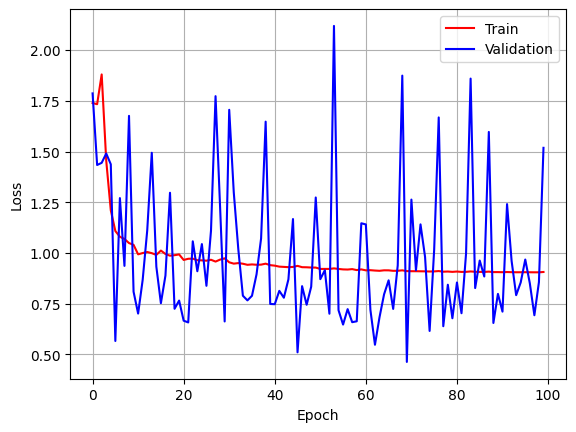

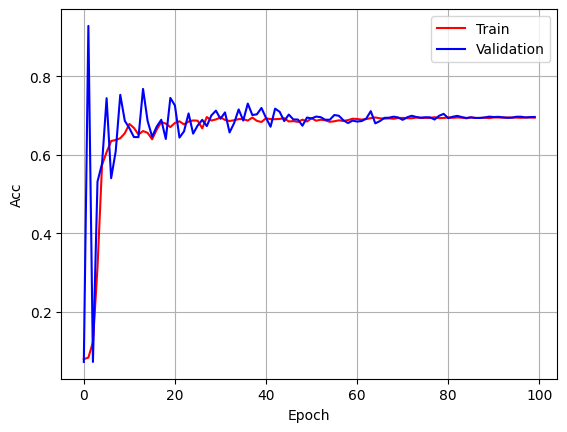

In [12]:
epoch_counter = num_epochs

plt.plot(range(epoch_counter), loss_train_hist, 'r-', label='Train')
plt.plot(range(epoch_counter), loss_val_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(range(epoch_counter), acc_train_hist, 'r-', label='Train')
plt.plot(range(epoch_counter), acc_val_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.grid(True)
plt.legend()
plt.show()

In [161]:
test = pd.read_csv("/kaggle/input/last-data/test (1).csv")
test = test.drop(["Unnamed: 0"] ,axis = 1)

encoded_data = encoder.fit_transform(test[['smoking_status']])

# Get the categories that were encoded
categories = encoder.categories_

# Create custom column names based on the categories
column_names = [f'smoking_status_{cat}' for cat in categories[0][0:]]

# Create a new DataFrame with the one-hot encoded columns and custom column names
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

# Concatenate the new DataFrame with the original DataFrame, drop the original 'smoking_status' column
test = pd.concat([test, encoded_df], axis=1).drop(columns=['smoking_status'] ,axis = 1)
test_set = test

X_test = test.drop(["stroke"] ,axis = 1)
y_test = test["stroke"]
Y_test = y_test
tempX = X_test
temp = X_test
X_test

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,smoking_status_0,smoking_status_1,smoking_status_2
0,41.00,0,0,64.88,22.5,1,0,0,1,0,0,1,0,0,1,1.0,0.0,0.0
1,20.00,0,0,61.48,30.8,1,0,0,0,0,0,0,1,0,0,1.0,0.0,0.0
2,68.00,0,1,217.68,28.3,1,0,0,1,0,0,1,0,0,1,0.0,0.0,1.0
3,16.00,0,0,82.50,26.2,1,0,0,0,0,0,1,0,0,0,0.0,1.0,0.0
4,52.00,1,0,214.43,39.9,0,1,0,1,1,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,27.00,0,0,94.81,35.8,1,0,0,0,0,0,1,0,0,1,0.0,1.0,0.0
8676,59.00,0,0,97.29,21.5,1,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0
8677,53.00,0,0,64.48,30.7,1,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0
8678,0.32,0,0,117.20,19.1,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0


In [162]:
label_0 = test_set[test_set['stroke'] == 0].sample(100, random_state=113)
label_1 = test_set[test_set['stroke'] == 1].sample(100, random_state=113)
test_set = pd.concat([label_0, label_1], axis=0)
x_test = test_set.drop(['stroke'], axis=1)
y_test = test_set['stroke']
x_test[["age", "avg_glucose_level", "bmi"]] = sc.transform(x_test[["age", "avg_glucose_level", "bmi"]])
x_test = x_test.values.reshape(len(x_test), 3, 6)

In [163]:
inputs = torch.FloatTensor(x_test).to(device)
inputs = inputs.unsqueeze(1)
inputs = inputs.float()
#print(inputs.size())
model = torch.load("/kaggle/input/best-model/Model41.pt") 
output = model(inputs)

per  = torch.sigmoid(output)

per[per <= 0.65] = 0
per[per > 0.65] = 1 

In [164]:
from sklearn.metrics import classification_report

# Assuming 'per' is a PyTorch tensor on the GPU, move it to the CPU
per_cpu = per.cpu().detach().numpy()


# Now you can use 'classification_report' with CPU tensors
print(classification_report(y_test, per_cpu.squeeze()))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.84      0.84      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [165]:
boolS = (per_cpu.squeeze() == 1) & y_test.eq(0) 
fn = (boolS[boolS == True])
fn.index

Index([1924, 2260, 5104, 3779, 1031,  545, 8659, 4768, 7349, 8427, 3840, 6667,
       5022, 1321, 3185, 5722],
      dtype='int64')

In [190]:
fns = (temp.iloc[fn.index])
fns[["age", "avg_glucose_level", "bmi"]] = sc.transform(fns[["age", "avg_glucose_level", "bmi"]])
fns


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,smoking_status_0,smoking_status_1,smoking_status_2
1924,0.858435,0,0,0.651071,0.222481,0,1,0,1,0,0,1,0,0,1,1.0,0.0,0.0
2260,0.858435,1,0,0.275850,0.239404,0,1,0,1,1,0,0,0,0,1,0.0,1.0,0.0
5104,0.742305,0,0,0.117404,0.209622,1,0,0,1,0,0,1,0,0,1,0.0,1.0,0.0
3779,0.707466,0,1,0.356624,0.222481,0,1,0,1,0,0,0,1,0,1,0.0,0.0,1.0
1031,0.928113,0,0,0.031381,0.185567,0,1,0,1,1,0,0,0,0,1,0.0,1.0,0.0
545,0.742305,0,0,0.264855,0.342497,1,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0
8659,0.939726,0,0,0.076769,0.134021,1,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0
4768,0.904887,0,0,0.756068,0.403207,0,1,0,1,1,0,0,0,0,0,1.0,0.0,0.0
7349,0.730692,1,0,0.037623,0.205040,1,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0
8427,0.777144,0,0,0.078588,0.205040,0,1,0,1,0,0,1,0,0,1,0.0,1.0,0.0


In [223]:
boolS = (per_cpu.squeeze() == 1) & y_test.eq(1) 
tp = (boolS[boolS == True])
tps = (temp.iloc[tp.index])
tps[["age", "avg_glucose_level", "bmi"]] = sc.transform(tps[["age", "avg_glucose_level", "bmi"]])
tps


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,smoking_status_0,smoking_status_1,smoking_status_2
3837,0.904887,0,0,0.807698,0.185567,1,0,0,1,0,0,0,1,0,1,0.0,0.0,1.0
5445,0.835209,1,0,0.105375,0.146621,1,0,0,1,0,0,1,0,0,1,0.0,1.0,0.0
1058,0.661014,1,1,0.180196,0.264605,0,1,0,1,0,0,1,0,0,1,0.0,1.0,0.0
8088,0.788757,0,0,0.669342,0.332188,1,0,0,1,0,0,1,0,0,1,0.0,0.0,1.0
5429,0.765531,0,0,0.106491,0.232532,1,0,0,1,1,0,0,0,0,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,0.928113,1,0,0.199169,0.233677,1,0,0,1,0,0,0,1,0,0,1.0,0.0,0.0
8303,0.916500,0,0,0.176558,0.139748,0,1,0,1,0,0,1,0,0,1,1.0,0.0,0.0
7560,0.928113,0,0,0.100869,0.156930,1,0,0,1,0,0,1,0,0,0,0.0,0.0,1.0
7992,0.928113,0,0,0.063252,0.397480,1,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0


# TP0

In [230]:
boolS = (per_cpu.squeeze() == 0) & y_test.eq(0) 
tp = (boolS[boolS == True])
tps0 = (temp.iloc[tp.index])
tps0[["age", "avg_glucose_level", "bmi"]] = sc.transform(tps0[["age", "avg_glucose_level", "bmi"]])
tps0


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,smoking_status_0,smoking_status_1,smoking_status_2
7789,0.033910,0,0,0.169158,0.119129,0,1,0,0,0,0,0,0,1,1,0.0,0.0,1.0
8653,0.254558,0,0,0.068791,0.208477,1,0,0,0,0,0,1,0,0,1,1.0,0.0,0.0
5338,0.405527,0,0,0.055522,0.191294,0,1,0,1,0,0,1,0,0,0,0.0,0.0,1.0
2446,0.556496,0,0,0.190695,0.222481,0,1,0,1,0,0,1,0,0,1,0.0,0.0,1.0
1613,0.173266,0,0,0.157212,0.187858,1,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.277784,0,0,0.035680,0.335624,1,0,0,0,0,0,1,0,0,0,0.0,1.0,0.0
1199,0.382301,0,0,0.071561,0.120275,0,1,0,1,0,0,1,0,0,1,0.0,0.0,1.0
8434,0.440366,0,0,0.246873,0.294387,1,0,0,1,1,0,0,0,0,0,0.0,1.0,0.0
3715,0.451979,0,0,0.127201,0.158076,0,1,0,1,0,0,1,0,0,1,1.0,0.0,0.0


In [13]:
import torch
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader

X_test[["age", "avg_glucose_level", "bmi"]] = sc.transform(X_test[["age", "avg_glucose_level", "bmi"]])


# Assuming X_test is a pandas DataFrame
X_test = X_test.values.reshape(len(X_test), 3, 6)

# Convert the y_test pandas Series to a PyTorch tensor
y_test_tensor = torch.FloatTensor(Y_test.values)

# Create the test dataset using both X_test and y_test_tensor
test_dataset = TensorDataset(torch.FloatTensor(X_test), y_test_tensor)

test_loader = DataLoader(test_dataset, batch_size=120)

In [16]:
from torchmetrics.classification import BinaryAccuracy


model = torch.load("/kaggle/input/best-model/Model41.pt") 

def predict():
    predicted = torch.tensor([]).to(device) 
    prob = torch.tensor([]).to(device) 
    acc_train = BinaryAccuracy().to(device)
    
    with torch.no_grad():
        
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            inputs = inputs.unsqueeze(1)
            inputs = inputs.float()
            labels = labels.float()
            
            outputs = model(inputs)           
        
            predictions = torch.sigmoid(outputs)
            
            prob = torch.cat((prob, torch.sigmoid(outputs)), dim=0)
            
            predictions[predictions <= 0.65] = 0
            predictions[predictions > 0.65] = 1   
            
            predicted = torch.cat((predicted, predictions), dim=0)
            
            #acc_train.update(outputs.squeeze(), labels.squeeze().int())

    return predicted ,prob


In [17]:
inp,prob = predict()
inp = inp.cpu().numpy()
prob= prob.cpu().numpy()


from sklearn.metrics import classification_report

print(classification_report(Y_test, inp.squeeze()))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84      8523
           1       0.05      0.82      0.10       157

    accuracy                           0.73      8680
   macro avg       0.52      0.77      0.47      8680
weighted avg       0.98      0.73      0.83      8680



In [18]:
tempX["Label"] = Y_test
tempX["Prediction"] = inp
tempX["prob"] = prob
tempX

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,smoking_status_0,smoking_status_1,smoking_status_2,Label,Prediction,prob
0,0.475205,0,0,0.065071,0.139748,1,0,0,1,0,...,1,0,0,1,1.0,0.0,0.0,0,0.0,0.140057
1,0.231332,0,0,0.051016,0.234822,1,0,0,0,0,...,0,1,0,0,1.0,0.0,0.0,0,0.0,0.000064
2,0.788757,0,1,0.696707,0.206186,1,0,0,1,0,...,1,0,0,1,0.0,0.0,1.0,0,1.0,0.924633
3,0.184879,0,0,0.137907,0.182131,1,0,0,0,0,...,1,0,0,0,0.0,1.0,0.0,0,0.0,0.000010
4,0.602948,1,0,0.683272,0.339061,0,1,0,1,1,...,0,0,0,0,0.0,0.0,1.0,0,0.0,0.329281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,0.312623,0,0,0.188794,0.292096,1,0,0,0,0,...,1,0,0,1,0.0,1.0,0.0,0,0.0,0.001180
8676,0.684240,0,0,0.199045,0.128293,1,0,0,1,0,...,1,0,0,0,1.0,0.0,0.0,0,1.0,0.684604
8677,0.614562,0,0,0.063417,0.233677,1,0,0,0,0,...,1,0,0,0,1.0,0.0,0.0,0,0.0,0.636235
8678,0.002787,0,0,0.281348,0.100802,1,0,0,0,0,...,0,0,1,1,0.0,0.0,1.0,0,0.0,0.003669


In [19]:
tp = tempX[(tempX["Label"] == 1) & (tempX["Prediction"] == 1)]
fn = tempX[(tempX["Label"] == 0) & (tempX["Prediction"] == 1)]
fn

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,smoking_status_0,smoking_status_1,smoking_status_2,Label,Prediction,prob
2,0.788757,0,1,0.696707,0.206186,1,0,0,1,0,...,1,0,0,1,0.0,0.0,1.0,0,1.0,0.924633
10,0.730692,0,0,0.236663,0.406644,0,1,0,1,0,...,1,0,0,0,0.0,0.0,1.0,0,1.0,0.808534
12,0.846822,0,0,0.180196,0.167239,0,1,0,1,0,...,0,1,0,0,0.0,0.0,1.0,0,1.0,0.883022
14,0.916500,0,1,0.186479,0.184422,1,0,0,1,0,...,1,0,0,1,1.0,0.0,0.0,0,1.0,0.906611
23,0.684240,0,0,0.065277,0.170676,0,1,0,1,0,...,1,0,0,1,0.0,1.0,0.0,0,1.0,0.804204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,0.939726,0,0,0.076769,0.134021,1,0,0,0,0,...,1,0,0,0,1.0,0.0,0.0,0,1.0,0.940246
8661,0.719079,0,0,0.667606,0.093929,1,0,0,1,0,...,1,0,0,0,0.0,0.0,1.0,0,1.0,0.756765
8669,0.637788,0,0,0.136543,0.218786,0,1,0,1,0,...,1,0,0,0,0.0,1.0,0.0,0,1.0,0.660073
8670,0.742305,0,0,0.180981,0.170676,1,0,0,1,0,...,1,0,0,0,0.0,1.0,0.0,0,1.0,0.731213


In [131]:
!pip install shap

In [191]:
fns.values.reshape(len(fns), 3, 6)

array([[[0.85843513, 0.        , 0.        , 0.65107055, 0.22248124,
         0.        ],
        [1.        , 0.        , 1.        , 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 1.        , 1.        , 0.        ,
         0.        ]],

       [[0.85843513, 1.        , 0.        , 0.27585047, 0.23940435,
         0.        ],
        [1.        , 0.        , 1.        , 1.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , 0.        , 1.        ,
         0.        ]],

       [[0.74230484, 0.        , 0.        , 0.11740401, 0.20962199,
         1.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 1.        , 0.        , 1.        ,
         0.        ]],

       [[0.70746575, 0.        , 1.        , 0.35662386, 0.22248124,
         0.        ],
        [1.        , 0.        , 1.        , 0.        , 0.        ,
         0.    

In [232]:
# since shuffle=True, this is a random sample of test data
batch = next(iter(test_loader))
images, labels = batch

#background = images[:100]
background = torch.tensor(x_test)
background = background.to(device)
test_images = test_images.to(device)
model.to(device)
background = background.unsqueeze(1)
background = background.float()


#test_labels = labels[100:101]
test_images = torch.tensor(tps0.values.reshape(len(tps0), 3, 6))

test_labels = torch.tensor(y_test.values)
test_images = test_images.unsqueeze(1)
test_images = test_images.float()

e = shap.DeepExplainer(model, background);
shap_values = e.shap_values(test_images);

In [233]:
shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test_images.numpy(), 1, -1), 1, 2)

# FN

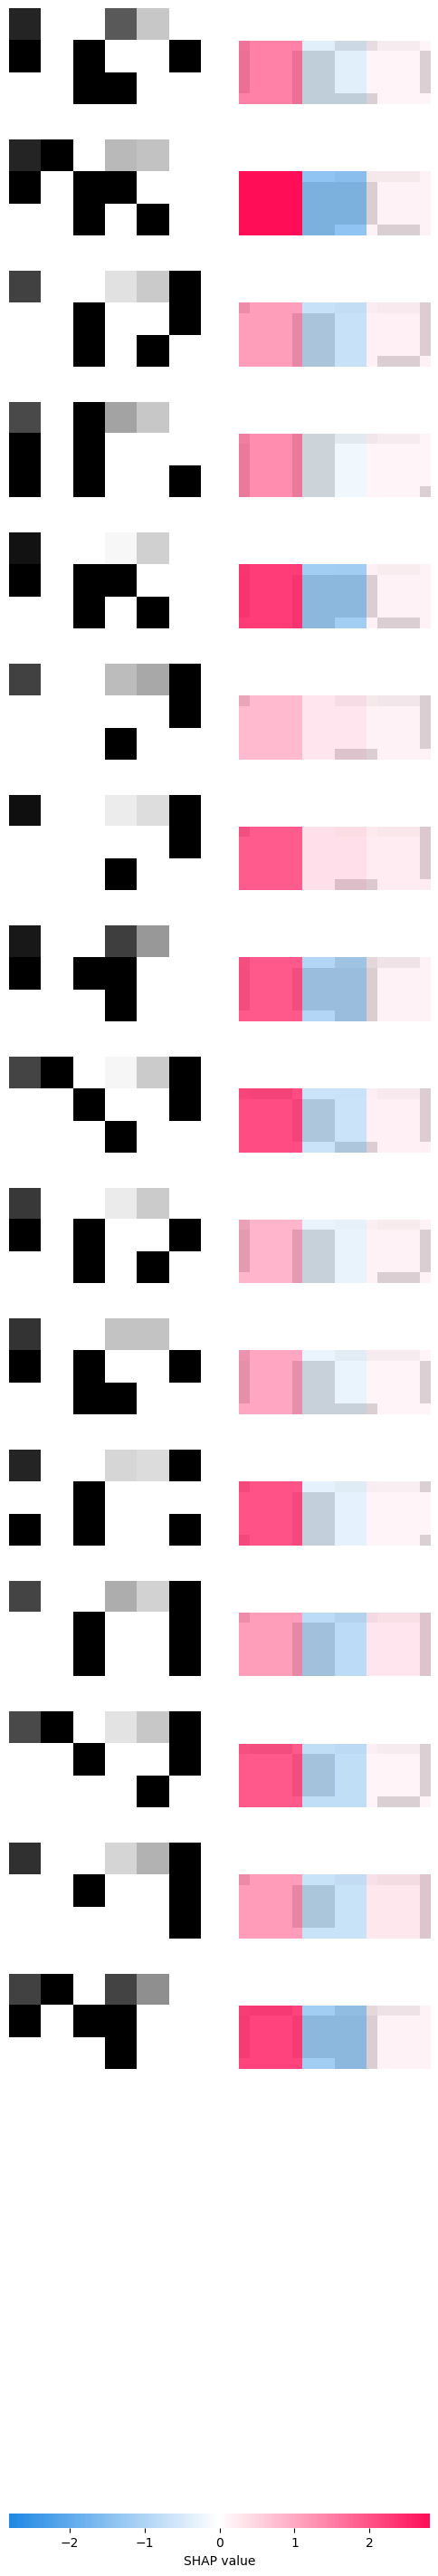

In [196]:
# plot the feature attributions
shap_numpy_temp = torch.tensor(shap_numpy).squeeze(-1) # Remove the last dimension
test_numpy_temp = torch.tensor(test_numpy).squeeze(-1) 

shap_numpy_temp = shap_numpy_temp.cpu().numpy()
test_numpy_temp = test_numpy_temp.cpu().numpy()


shap.image_plot(shap_numpy_temp, -test_numpy_temp)

# TP

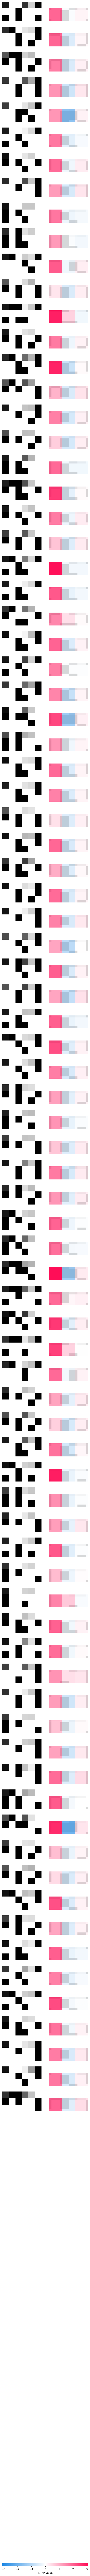

In [229]:
# plot the feature attributions
shap_numpy_temp = torch.tensor(shap_numpy).squeeze(-1) # Remove the last dimension
test_numpy_temp = torch.tensor(test_numpy).squeeze(-1) 

shap_numpy_temp = shap_numpy_temp.cpu().numpy()
test_numpy_temp = test_numpy_temp.cpu().numpy()


shap.image_plot(shap_numpy_temp, -test_numpy_temp)

# TP 0

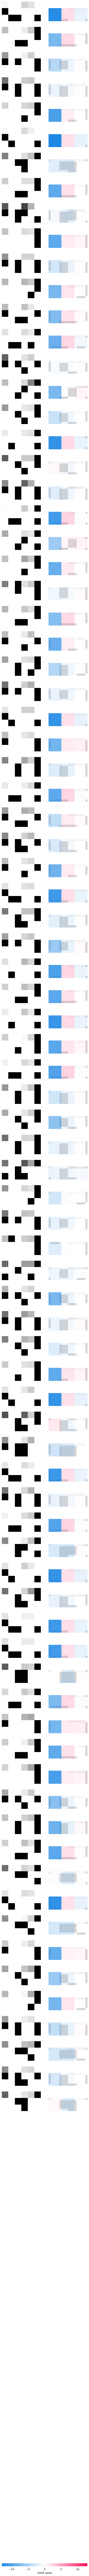

In [234]:
# plot the feature attributions
shap_numpy_temp = torch.tensor(shap_numpy).squeeze(-1) # Remove the last dimension
test_numpy_temp = torch.tensor(test_numpy).squeeze(-1) 

shap_numpy_temp = shap_numpy_temp.cpu().numpy()
test_numpy_temp = test_numpy_temp.cpu().numpy()


shap.image_plot(shap_numpy_temp, -test_numpy_temp)

In [198]:
fns

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,smoking_status_0,smoking_status_1,smoking_status_2
1924,0.858435,0,0,0.651071,0.222481,0,1,0,1,0,0,1,0,0,1,1.0,0.0,0.0
2260,0.858435,1,0,0.275850,0.239404,0,1,0,1,1,0,0,0,0,1,0.0,1.0,0.0
5104,0.742305,0,0,0.117404,0.209622,1,0,0,1,0,0,1,0,0,1,0.0,1.0,0.0
3779,0.707466,0,1,0.356624,0.222481,0,1,0,1,0,0,0,1,0,1,0.0,0.0,1.0
1031,0.928113,0,0,0.031381,0.185567,0,1,0,1,1,0,0,0,0,1,0.0,1.0,0.0
545,0.742305,0,0,0.264855,0.342497,1,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0
8659,0.939726,0,0,0.076769,0.134021,1,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0
4768,0.904887,0,0,0.756068,0.403207,0,1,0,1,1,0,0,0,0,0,1.0,0.0,0.0
7349,0.730692,1,0,0.037623,0.205040,1,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0
8427,0.777144,0,0,0.078588,0.205040,0,1,0,1,0,0,1,0,0,1,0.0,1.0,0.0


In [197]:
torch.tensor(fns.values.reshape(len(fns), 3, 6))

tensor([[[0.8584, 0.0000, 0.0000, 0.6511, 0.2225, 0.0000],
         [1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
         [0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000]],

        [[0.8584, 1.0000, 0.0000, 0.2759, 0.2394, 0.0000],
         [1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000]],

        [[0.7423, 0.0000, 0.0000, 0.1174, 0.2096, 1.0000],
         [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
         [0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000]],

        [[0.7075, 0.0000, 1.0000, 0.3566, 0.2225, 0.0000],
         [1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000],
         [1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000]],

        [[0.9281, 0.0000, 0.0000, 0.0314, 0.1856, 0.0000],
         [1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000]],

        [[0.7423, 0.0000, 0.0000, 0.2649, 0.3425, 1.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.00

In [221]:
print((np.array(fns.columns).reshape(1, 3, 6)))

[[['age' 'hypertension' 'heart_disease' 'avg_glucose_level' 'bmi'
   'gender_Female']
  ['gender_Male' 'gender_Other' 'ever_married_Yes' 'work_type_Govt_job'
   'work_type_Never_worked' 'work_type_Private']
  ['work_type_Self-employed' 'work_type_children' 'Residence_type_Rural'
   'smoking_status_0' 'smoking_status_1' 'smoking_status_2']]]
